# Урок 3. Логистическая регрессия

Небольшой шаг назад...

Линейная регрессия
![img/lr.png](img/lr.png)

- Предсказываем значение у, которые могут принимать любые значения из R
- Предсказываем через линейную комбинацию $$\vec y = X \vec w$$
- Находим оптимальные W с помощью градиентного спуска
- Функция потерь (MSE): $$L(x, y, w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \vec{w}^T \vec{x}_i)^2$$

Как же предсказать значения у == 0/1 ?

-

In [1]:
import numpy as np
import matplotlib.pyplot as plt

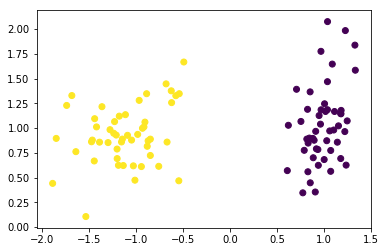

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

Функция потерь:  
$$L(𝑎,𝑋)=\frac{1}{l}\sum_{i=1}^n[𝑀𝑖<0]$$  
штрафуем за кол-во ошибок

In [3]:
def loss_func(x):
    return 0 if x > 0 else 1

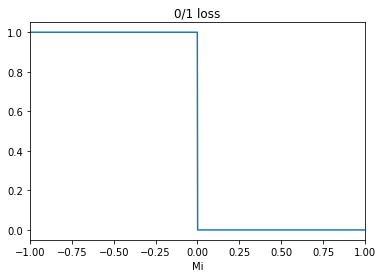

In [4]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

Логлосс:
- при у = {0;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = −\frac{1}{l}\sum_{i=1}^n(y_𝑖ln(a(x_i))+(1−y_𝑖)ln(1 - a(x_i))$$
- при у = {-1;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = - \sum_{i=1}^{\ell} \log (1 + \exp^{-a(x_i)})$$ где $$a(x_i) = y_i\vec{w}^T\vec{x_i}$$

In [5]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [6]:
def exp_func(x):
    return np.exp(-x)

In [7]:
def square_loss(x):
    return (1 - x)**2

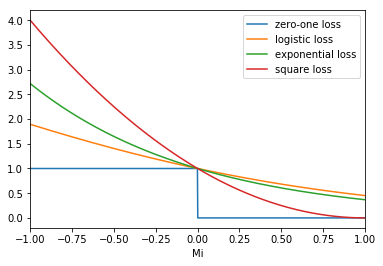

In [8]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

### Logreg на примере

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [10]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [11]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [12]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [13]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [14]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [15]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [16]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

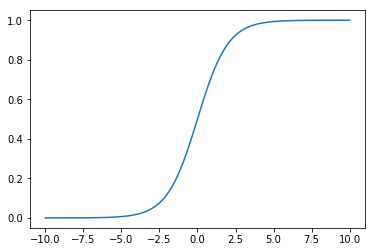

In [19]:
plt.plot(z, p);

In [20]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [21]:
W = logreg_eval_model(X_st, y, iterations=1000, alpha=1e-4)

итерация: 100, logloss: 1.5996538673708376, веса: [-1.76495316  0.08730161 -1.12929916 -0.64272316]
итерация: 200, logloss: 1.5767525572049883, веса: [-1.76108551  0.09900809 -1.1279574  -0.63405146]
итерация: 300, logloss: 1.554036925497323, веса: [-1.75724337  0.11066933 -1.12660468 -0.62541634]
итерация: 400, logloss: 1.5315150976159981, веса: [-1.75342735  0.12228271 -1.12524133 -0.61681915]
итерация: 500, logloss: 1.5091958490387767, веса: [-1.74963809  0.13384536 -1.12386772 -0.60826133]
итерация: 600, logloss: 1.4870886643594083, веса: [-1.74587627  0.14535416 -1.12248429 -0.59974443]
итерация: 700, logloss: 1.465203798107477, веса: [-1.7421426   0.15680564 -1.12109157 -0.59127007]
итерация: 800, logloss: 1.443552336114085, веса: [-1.73843781  0.16819602 -1.11969016 -0.58284002]
итерация: 900, logloss: 1.4221462556853233, веса: [-1.73476267  0.17952116 -1.11828074 -0.57445613]
итерация: 1000, logloss: 1.400998482285436, веса: [-1.731118    0.19077649 -1.11686409 -0.56612042]


### Домашнее задание

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 

In [22]:
def calc_logloss(y, y_pred):
    y_pred[y_pred == 0] = 0.00001
    y_pred[y_pred == 1] = 0.99999
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [23]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [24]:
X_st = X.copy()
X_st = custom_StandardScaler(X_st)

In [25]:
W = logreg_eval_model(X_st, y, iterations=100000, alpha=1e-3)

итерация: 10000, logloss: 0.7300722297746642, веса: [-1.46796509  0.38050536 -0.29398192 -0.34664092]
итерация: 20000, logloss: 0.7030402971209572, веса: [-1.19530985  0.65371643 -0.09348062 -0.07103671]
итерация: 30000, logloss: 0.692899327148099, веса: [-1.02842787  0.81978874  0.02978521  0.09853229]
итерация: 40000, logloss: 0.6891396943282669, веса: [-0.92680282  0.91976371  0.10508725  0.20268214]
итерация: 50000, logloss: 0.6877439817930949, веса: [-0.86483265  0.97957361  0.15106644  0.26707817]
итерация: 60000, logloss: 0.6872233899880003, веса: [-0.82693282  1.01500367  0.17917188  0.30734366]
итерация: 70000, logloss: 0.68702801684985, веса: [-0.80367763  1.03560082  0.19637271  0.3329278 ]
итерация: 80000, logloss: 0.6869539776319967, веса: [-0.78935496  1.04715066  0.20691057  0.34955702]
итерация: 90000, logloss: 0.6869253406590483, веса: [-0.78049135  1.05317131  0.2133719   0.36071347]
итерация: 100000, logloss: 0.6869137273619155, веса: [-0.77496851  1.05580828  0.2173

In [26]:
W

array([-0.77496851,  1.05580828,  0.21733681,  0.36852075])

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [27]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [28]:
calc_pred_proba(W, X_st)

array([0.44718956, 0.46938124, 0.47568223, 0.4582647 , 0.55422047,
       0.47998619, 0.56099231, 0.61764362, 0.44167088, 0.50360175])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [29]:
def calc_pred(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    return y_pred

In [30]:
y_pred = calc_pred(W, X_st)

In [31]:
y_pred

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

In [32]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [33]:
accuracy = sum(y_pred == y)/len(y)

In [34]:
accuracy

0.7

In [35]:
TP = len(y_pred[(y_pred == y) & (y_pred == 1)])

In [36]:
TP

3

In [37]:
TN = len(y_pred[(y_pred == y) & (y_pred == 0)])

In [38]:
TN

4

In [39]:
FP = len(y_pred[(y_pred != y) & (y_pred == 1)])

In [40]:
FP

1

In [41]:
FN = len(y_pred[(y_pred != y) & (y_pred == 0)])

In [42]:
FN

2

In [48]:
import pandas as pd

In [51]:
matrix = pd.DataFrame([[TP, FP],
                    [FN, TN]], index = ['a(x)=+1', 'a(x)=-1'], columns = ['y=+1','y=-1'])

In [52]:
matrix

,y=+1,y=-1
a(x)=+1,3,1
a(x)=-1,2,4


In [53]:
precision = TP/(TP + FP)

In [54]:
precision

0.75

In [55]:
recall = TP/(TP + FN)

In [56]:
recall

0.6

In [57]:
F1 = 2*precision*recall/(precision+recall)

In [58]:
F1

0.6666666666666665

### 6. Могла ли модель переобучиться? Почему?

In [59]:
W

array([-0.77496851,  1.05580828,  0.21733681,  0.36852075])

Один коэффициент больше другого в 5 раз, поэтому можно предположить, что есть переобучение

### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [100]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [61]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [80]:
W = eval_model_l1(X_st, y, iterations=100000, alpha=1e-3, lambda_=1e-2)

итерация: 10000, logloss: 0.725410400306379, веса: [-1.36342023  0.28476083 -0.25798813 -0.24218175]
итерация: 20000, logloss: 0.699967922073726, веса: [-0.99534804  0.45286624 -0.04998602  0.05186014]
итерация: 30000, logloss: 0.6928612608903307, веса: [-0.73384012  0.51333505  0.02416765  0.11599683]
итерация: 40000, logloss: 0.6902988858424661, веса: [-0.53736731  0.50849036  0.07126161  0.1150907 ]
итерация: 50000, logloss: 0.6890823655428313, веса: [-0.36558743  0.47863614  0.10018071  0.08943037]
итерация: 60000, logloss: 0.6884672166037797, веса: [-0.20879969  0.43359769  0.11797764  0.04874061]
итерация: 70000, logloss: 0.6881323234214364, веса: [-6.11366291e-02  3.79318267e-01  1.29020374e-01  3.58518786e-06]
итерация: 80000, logloss: 0.6880809504314094, веса: [-7.03904541e-07  3.19523795e-01  1.32350464e-01  6.95929502e-07]
итерация: 90000, logloss: 0.6884306638286967, веса: [7.92068961e-06 2.71088408e-01 1.20985703e-01 5.64433207e-06]
итерация: 100000, logloss: 0.68875634118

In [81]:
y_pred = calc_pred(W, X_st)

In [82]:
y_pred

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 1.])

In [83]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [85]:
accuracy = sum(y_pred == y)/len(y)
accuracy

0.7

In [87]:
TP = len(y_pred[(y_pred == y) & (y_pred == 1)])
TP

4

In [88]:
TN = len(y_pred[(y_pred == y) & (y_pred == 0)])
TN

3

In [89]:
FP = len(y_pred[(y_pred != y) & (y_pred == 1)])
FP

2

In [90]:
FN = len(y_pred[(y_pred != y) & (y_pred == 0)])
FN

1

In [91]:
matrix = pd.DataFrame([[TP, FP],
                    [FN, TN]], index = ['a(x)=+1', 'a(x)=-1'], columns = ['y=+1','y=-1'])

In [92]:
matrix

,y=+1,y=-1
a(x)=+1,4,2
a(x)=-1,1,3


In [93]:
precision = TP/(TP + FP)

In [94]:
precision

0.6666666666666666

In [95]:
recall = TP/(TP + FN)

In [96]:
recall

0.8

In [97]:
F1 = 2*precision*recall/(precision+recall)

In [98]:
F1

0.7272727272727272

In [133]:
W = eval_model_l2(X_st, y, iterations=100000, alpha=1e-3, lambda_=1e-1)

итерация: 10000, logloss: 0.699512686358676, веса: [-0.51775447  0.16189783 -0.06017277 -0.10456191]
итерация: 20000, logloss: 0.6905909706592259, веса: [-0.1160261   0.13326364  0.06701047  0.03764228]
итерация: 30000, logloss: 0.6892922926387017, веса: [0.00721125 0.0978724  0.09570673 0.06534981]
итерация: 40000, logloss: 0.6890340487574784, веса: [0.04706109 0.07929869 0.10219431 0.07004428]
итерация: 50000, logloss: 0.6889769526761373, веса: [0.06049295 0.07122313 0.10366878 0.0705408 ]
итерация: 60000, logloss: 0.6889638746358563, веса: [0.06515914 0.0679741  0.10400684 0.07044791]
итерация: 70000, logloss: 0.6889608106739677, веса: [0.06681408 0.06671657 0.10408543 0.07035202]
итерация: 80000, logloss: 0.6889600734486835, веса: [0.06740908 0.06624001 0.10410409 0.07030292]
итерация: 90000, logloss: 0.6889598895141744, веса: [0.06762487 0.06606157 0.10410865 0.07028176]
итерация: 100000, logloss: 0.6889598413946549, веса: [0.06770355 0.06599523 0.10410982 0.07027328]


In [134]:
y_pred = calc_pred(W, X_st)

In [135]:
y_pred

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 1.])

In [136]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [137]:
accuracy = sum(y_pred == y)/len(y)
accuracy

0.7

In [138]:
TP = len(y_pred[(y_pred == y) & (y_pred == 1)])
TP

4

In [139]:
TN = len(y_pred[(y_pred == y) & (y_pred == 0)])
TN

3

In [140]:
FP = len(y_pred[(y_pred != y) & (y_pred == 1)])
FP

2

In [141]:
FN = len(y_pred[(y_pred != y) & (y_pred == 0)])
FN

1

In [142]:
matrix = pd.DataFrame([[TP, FP],
                    [FN, TN]], index = ['a(x)=+1', 'a(x)=-1'], columns = ['y=+1','y=-1'])

In [143]:
matrix

,y=+1,y=-1
a(x)=+1,4,2
a(x)=-1,1,3


In [144]:
precision = TP/(TP + FP)
precision

0.6666666666666666

In [145]:
recall = TP/(TP + FN)
recall

0.8

In [146]:
F1 = 2*precision*recall/(precision+recall)
F1

0.7272727272727272